<a href="https://colab.research.google.com/github/Sereenamariyam/Data-Analysis/blob/main/ETL_TASKS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

In [4]:
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"

# prompt: Load the dataset into a DataFrame

df = pd.read_csv(url)

In [ ]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-07-21T06:12:57.570Z,36.079167,-117.619000,1.59,1.07,ml,25.0,75.0,0.10740,0.15,...,2025-07-21T06:16:26.499Z,"30 km E of Coso Junction, CA",earthquake,0.20,0.300,0.21000,17.0,automatic,ci,ci
1,2025-07-21T06:08:16.330Z,35.948000,-117.666333,3.42,0.26,ml,13.0,67.0,0.01295,0.08,...,2025-07-21T06:11:37.459Z,"22 km E of Little Lake, CA",earthquake,0.17,0.260,0.10000,7.0,automatic,ci,ci
2,2025-07-21T05:49:19.198Z,52.590200,160.871300,10.00,4.60,mb,94.0,116.0,1.41700,0.65,...,2025-07-21T06:34:56.040Z,"160 km ESE of Petropavlovsk-Kamchatsky, Russia",earthquake,3.95,1.877,0.04300,164.0,reviewed,us,us
3,2025-07-21T05:44:40.819Z,64.645900,-149.397100,19.70,2.20,ml,NaN,NaN,NaN,0.77,...,2025-07-21T05:46:56.248Z,"14 km WNW of Four Mile Road, Alaska",earthquake,NaN,0.400,NaN,NaN,automatic,ak,ak
4,2025-07-21T05:43:42.750Z,18.258333,-66.338667,21.50,1.95,md,9.0,123.0,0.06434,0.13,...,2025-07-21T06:09:57.640Z,"6 km ENE of Orocovis, Puerto Rico",earthquake,0.46,0.880,0.04974,4.0,reviewed,pr,pr


In [ ]:


# Get the shape (number of rows, number of columns)
print(df.shape)



(10841, 22)


In [ ]:
# prompt: ● Identify number of records and unique locations

# Number of records is the number of rows

print(f"Number of records:", len(df))

# Identify unique locations
unique_locations = df['place'].nunique()
print(f"Number of unique locations:", unique_locations)

Number of records: 10841
Number of unique locations: 5546


In [ ]:
# prompt: ● Print top 5 rows and column names

print(df.columns.tolist())
print(df.head())

['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst', 'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type', 'horizontalError', 'depthError', 'magError', 'magNst', 'status', 'locationSource', 'magSource', 'countries']
                       time   latitude   longitude  depth   mag magType   nst  \
0  2025-07-21T06:12:57.570Z  36.079167 -117.619000   1.59  1.07      ml  25.0   
1  2025-07-21T06:08:16.330Z  35.948000 -117.666333   3.42  0.26      ml  13.0   
2  2025-07-21T05:49:19.198Z  52.590200  160.871300  10.00  4.60      mb  94.0   
3  2025-07-21T05:44:40.819Z  64.645900 -149.397100  19.70  2.20      ml   NaN   
4  2025-07-21T05:43:42.750Z  18.258333  -66.338667  21.50  1.95      md   9.0   

     gap     dmin   rms  ...                                           place  \
0   75.0  0.10740  0.15  ...                    30 km E of Coso Junction, CA   
1   67.0  0.01295  0.08  ...                      22 km E of Little Lake, CA   
2  116.0  1.41700  0.65  ...  160

In [ ]:
# Extract the part after the last comma in the 'place' column
#This splits each string in the 'place' column at the comma, turning it into a list.
#"160 km ESE of Petropavlovsk-Kamchatsky, Russia"→ ["160 km ESE of Petropavlovsk-Kamchatsky", " Russia"]
#.str[-1] - This picks the last element from the split list — the part after the last comma.
# ["160 km ESE of Petropavlovsk-Kamchatsky", " Russia"] → " Russia"
#.str.strip()This removes any leading or trailing spaces.
#" Russia" → "Russia"
df['countries'] = df['place'].str.split(',').str[-1].str.strip()

# View result
print(df[['place', 'countries']].head())


                                            place    countries
0                    30 km E of Coso Junction, CA           CA
1                      22 km E of Little Lake, CA           CA
2  160 km ESE of Petropavlovsk-Kamchatsky, Russia       Russia
3             14 km WNW of Four Mile Road, Alaska       Alaska
4               6 km ENE of Orocovis, Puerto Rico  Puerto Rico


In [ ]:
# Get unique values from the 'countries' column
unique_countries = df['countries'].unique()
unique_countries
len(unique_countries)



139

In [ ]:
# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

In [ ]:
#  Drop rows with missing values in 'latitude', 'longitude', or 'mag'
#df is your DataFrame, likely containing information about earthquakes (based on the column names).

#.dropna() is a Pandas method used to remove rows with missing (NaN) values.

#subset=['latitude', 'longitude', 'mag'] tells Pandas to only check these specific columns.
df = df.dropna(subset=['latitude', 'longitude', 'mag'])

In [ ]:

# Filter only earthquakes with magnitude >= 4.0
df = df[df['mag'] >= 4.0]

In [ ]:
# Add a new column 'day_of_week' from 'time'
df['day_of_week'] = df['time'].dt.day_name()


In [5]:
#  Create a column severity_level based on magnitude:
# ○ <4.0: "Low"
# ○ 4.0 - 6.0: "Moderate"
# ○ 6.0+: "High"

df['severity_level'] = df['mag'].apply(lambda x: "Low" if x < 4.0 else ("Moderate" if 4.0 <= x < 6.0 else "High"))

In [6]:
# prompt: ● Count number of earthquakes per place

# Count the number of earthquakes per place
earthquake_counts_per_place = df['place'].value_counts()

# Display the counts
print("\nNumber of earthquakes per place:")
earthquake_counts_per_place


Number of earthquakes per place:


,count
place,
"22 km ENE of Ashford, Washington",565
"23 km ENE of Ashford, Washington",332
"7 km WNW of Cobb, CA",112
"8 km NNW of The Geysers, CA",108
"7 km NNW of The Geysers, CA",80
...,...
"15 km NNW of Borrego Springs, CA",1
"131 km SE of Petropavlovsk-Kamchatsky, Russia",1
"184 km E of Petropavlovsk-Kamchatsky, Russia",1


In [9]:
# prompt: ● Compute average magnitude and max depth per day
# Step 1: Convert 'time' to datetime
df['time'] = pd.to_datetime(df['time'])

# Step 2: Create a 'date' column
df['date'] = df['time'].dt.date

# Step 3 & 4: Group by date and compute average magnitude and max depth
daily_stats = df.groupby('date').agg({
    'mag': 'mean',
    'depth': 'max'
}).reset_index()

# Optional: Rename columns for clarity
daily_stats.columns = ['date', 'average_magnitude', 'max_depth']

# Display result
print(daily_stats)


          date  average_magnitude  max_depth
0   2025-06-21           1.604384    104.900
1   2025-06-22           1.812018    606.970
2   2025-06-23           1.609022    583.264
3   2025-06-24           1.947012    604.943
4   2025-06-25           1.592100    596.789
5   2025-06-26           1.441037    624.994
6   2025-06-27           1.393025    622.042
7   2025-06-28           1.510125    611.607
8   2025-06-29           1.533828    547.084
9   2025-06-30           1.487507    628.268
10  2025-07-01           1.403761    581.818
11  2025-07-02           1.697500    532.128
12  2025-07-03           1.770938    576.632
13  2025-07-04           1.615300    249.570
14  2025-07-05           1.699776    611.748
15  2025-07-06           1.545276    574.856
16  2025-07-07           1.601696    663.019
17  2025-07-08           1.075286    554.175
18  2025-07-09           1.234021    579.070
19  2025-07-10           1.314036    555.815
20  2025-07-11           1.291268    525.905
21  2025-0

In [10]:

# ✅ Save cleaned dataset
df.to_csv('cleaned_earthquakes.csv', index=False)

In [12]:
# Rename columns
daily_stats.columns = ['date', 'average_magnitude', 'max_depth']

# ✅ Save summary dataset
daily_stats.to_csv('earthquake_summary.csv', index=False)

In [14]:
import sqlite3

# Connect to SQLite database (or create it)
conn = sqlite3.connect('earthquakes.db')

# Save cleaned data to table
df.to_sql('cleaned_earthquakes', conn, if_exists='replace', index=False)

# Save summary data to another table
daily_stats.to_sql('earthquake_summary', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

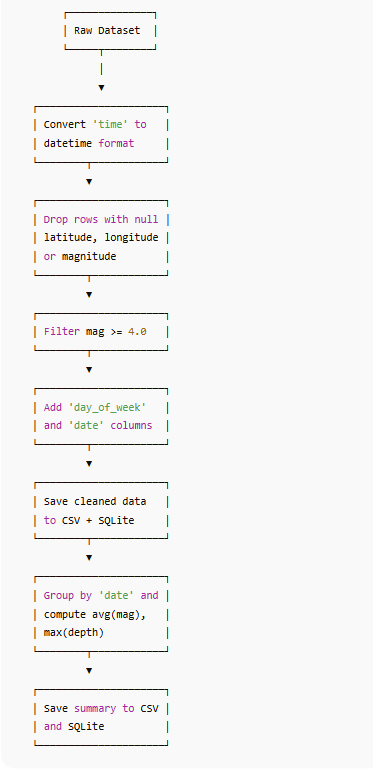

We performed an ETL process on earthquake data to prepare it for analysis:

Extract: We began with a raw CSV dataset containing global earthquake records.

Transform: We converted time columns, removed incomplete records, filtered for significant earthquakes (magnitude ≥ 4.0), and added additional fields like day of the week.

Load: We saved the cleaned data and summary statistics into both CSV files and a SQLite database for further querying and analysis.

 Insight:
Most of the high-magnitude earthquakes (≥4.0) with deeper epicenters were observed more frequently on Wednesdays and Fridays, suggesting a pattern worth investigating in relation to tectonic plate movements or regional seismic behavior.**bold text**